## HOME CREDIT CLIENT PAYMENT PREDICTION

PT. HOME CREDIT merupakan suatu perusahaan perusahaan pembiayaan multiguna multinasional yang memberikan layanan pembiayaan bagi pelanggan. Terdapat banyak pengajuan credit yang masuk tetapi akan sangat menghabiskan banyak waktu jika harus dilakukan review pengajuan satu per satu secara manual. 

In [259]:
# Import Library
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [260]:
#importing data for modeling
dataset = pd.read_csv('application.csv')
dataset.head(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
#Data Understanding
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Terdapat 122 kolom data dengan 48744 record data, dimana setiap record data merupakan data dari seorang client.

#### Data Cleansing and Preprocessing

Pertama, untuk modeling akan dilakukan feature selection dengan memilih kolom/feature mana saja yang dianggap dapat merepresentasikan profil client. 
Kami hanya akan menggunakan feature SK_ID_CURR, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, CNT_FAM_MEMBERS sebagai feature yang akan merepresentasikan client, dan fature TARGET sebagai label target yang akan diprediksi.

Dimana client dengan label target 1 dianggap gagal bayar, dan label target 0 dianggap dapat melakukan pembayaran.

In [262]:
# Feature Selection
datamodel = dataset[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS']]

In [263]:
# Missing data handle
isna = datamodel.isnull().sum().reset_index()
isna = isna[isna[0] > 0].reset_index()
isna

,level_0,index,0
0,9,AMT_ANNUITY,12
1,10,AMT_GOODS_PRICE,278
2,13,CNT_FAM_MEMBERS,2


Terdapat 3 kolom data yang memiliki missing value. Karena banyak record data yang mengandung missing value tidak banyak dan banyak record dalam dataset dianggap cukup banyak, sehingga akan dihapus record data dengan missing value. Selain itu imputasi data dianggap tidak baik karena ditakutkan akan merusak dataset karena tidak sesuai dengan kenyataan lapangan.

In [264]:
datamodel = datamodel.dropna()
datamodel.isnull().sum().sum()

0

Dataset tidak lagi memiliki missing value.

Pada dataset, terdapat client dengan gender XNA, client ini juga akan dihapus dari dataset karena tidak melengkapi data. 

In [265]:
datamodel = datamodel[datamodel['CODE_GENDER'] != 'XNA']

In [266]:
# Duplicated data handling
datamodel.duplicated().sum()

0

Tidak terdapat data duplikat pada model

In [267]:
# Checking data dimention
print("Data length before cleansing:", dataset.shape[0])

#deleting the missing data train
print("Data length after cleansing:", datamodel.shape[0])

Data length before cleansing: 307511
Data length after cleansing: 307217


In [268]:
# Checking data sample
datamodel.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Single / not married,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Married,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Single / not married,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Civil marriage,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Single / not married,1.0


Selanjutnya akan dilakukan feature encoding, dengan ketentuan :
* NAME_CONTRACT_TYPE akan diganti dengan 0 untuk 'Cash loans', dan 1 untuk 'Revolving loans'
* CODE_GENDER akan diganti dengan 0 untuk 'F', dan 1 untuk 'M'
* FLAG_OWN_CAR akan diganti dengan 0 untuk 'N', dan 1 untuk 'Y'
* FLAG_OWN_REALTY akan diganti dengan 0 untuk 'N', dan 1 untuk 'Y'
* NAME_INCOME_TYPE akan diganti dengan 0 untuk 'Businessman', 'Commercial associate', 'State servant', 'Working', dan 1 untuk 'Maternity leave', 'Pensioner', 'Student','Unemployed'.
* NAME_FAMILY_STATUS akan diganti dengan 0 untuk 'Separated', 'Single / not married', 'Widow', dan 1 untuk 'Civil marriage', 'Married'

In [269]:
# Feature encoding
datamodel['NAME_CONTRACT_TYPE'] = datamodel['NAME_CONTRACT_TYPE'].replace({'Cash loans' : 0, 'Revolving loans' : 1})
datamodel['CODE_GENDER'] = datamodel['CODE_GENDER'].replace({'F' : 0, 'M' : 1})
datamodel['FLAG_OWN_CAR'] = datamodel['FLAG_OWN_CAR'].replace({'N' : 0, 'Y' : 1})
datamodel['FLAG_OWN_REALTY'] = datamodel['FLAG_OWN_REALTY'].replace({'N' : 0, 'Y' : 1})
datamodel['NAME_INCOME_TYPE'] = datamodel['NAME_INCOME_TYPE'].replace({'Businessman' : 0, 'Commercial associate' : 0, 'State servant' : 0, 'Working' : 0, 'Maternity leave' : 1, 'Pensioner' : 1, 'Student' : 1, 'Unemployed' : 1})
datamodel['NAME_FAMILY_STATUS'] = datamodel['NAME_FAMILY_STATUS'].replace({'Separated' : 0, 'Single / not married' : 0, 'Widow' : 0, 'Civil marriage' : 1, 'Married' : 1})


In [270]:
# Checking data sample
datamodel.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,0,0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0,1,2.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0,0,1.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0,1,2.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,0,0,1.0


Kemudian dilakukan pemisahan feature dan label target prediksi

In [271]:
#Data preparation
#Splitting data train to features and target dataframe
Feature = datamodel.drop('TARGET',axis=1)
Target = datamodel['TARGET']

In [272]:
# Checking feature and target dataframe dimension
print('Shape of Feature : ', Feature.shape)
print('Shape of Target : ', Target.shape)

Shape of Feature :  (307217, 13)
Shape of Target :  (307217,)


Selanjutnya akan dilakukan data splitting menjadi data train dan data test, dimana rasio yang digunakan adalah 70% data train, dan 30% data test

In [273]:
#Data preparation
#splitting data (80% data train and 20% data test) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Feature, Target, test_size=0.30,random_state=0)
X_test_copy = X_test.copy()

In [274]:
# Hapus SK_ID_CURR
X_train = X_train.drop('SK_ID_CURR',axis=1)
X_test = X_test.drop('SK_ID_CURR',axis=1)

In [275]:
# Checking Train and test dimension
print('Shape of Feature of data train: ', X_train.shape)
print('Shape of Target of data train : ', y_train.shape)
print('Shape of Feature of data test: ', X_test.shape)
print('Shape of Target of data test : ', y_test.shape)

Shape of Feature of data train:  (215051, 12)
Shape of Target of data train :  (215051,)
Shape of Feature of data test:  (92166, 12)
Shape of Target of data test :  (92166,)


Setelah itu akan dicek apakah data train memiliki outlier yang perlu dihandle. Checking dilakukan dengan kaidah IQR.

In [276]:
X_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
151965,1,1,1,1,1,103500.0,180000.0,9000.0,180000.0,0,1,3.0
112190,0,1,0,1,0,225000.0,343800.0,16155.0,225000.0,0,1,2.0
258615,0,0,0,1,0,90000.0,148365.0,10453.5,135000.0,1,0,1.0
139169,1,1,0,0,0,135000.0,270000.0,13500.0,270000.0,0,1,2.0
66289,0,0,1,1,0,171000.0,729396.0,49072.5,688500.0,0,1,2.0


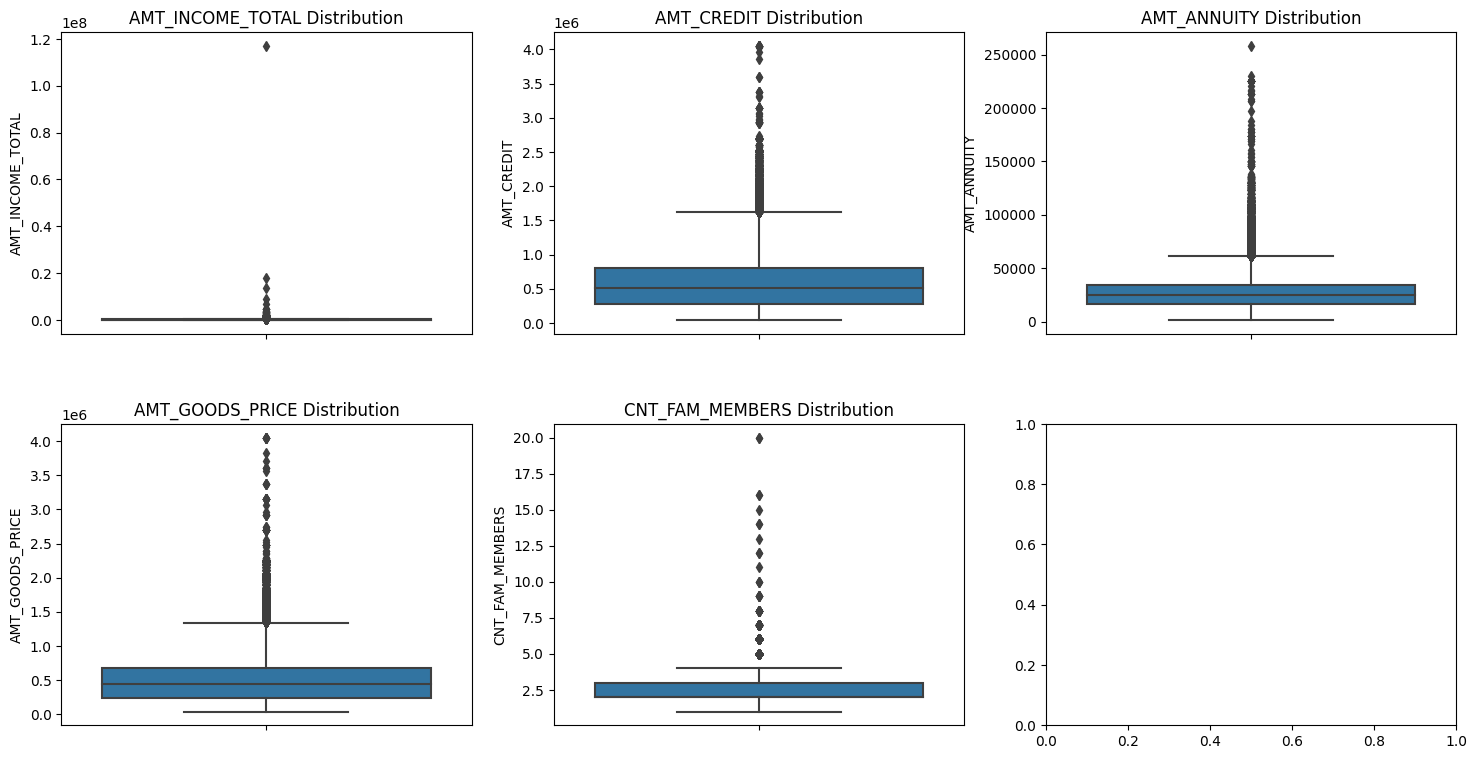

In [277]:
# Data Train BOX PLOT
box_plot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(18, 9))

sns.boxplot(y = datamodel['AMT_INCOME_TOTAL'], ax = axs[0,0])
axs[0,0].set_title('AMT_INCOME_TOTAL Distribution')
sns.boxplot(y = datamodel['AMT_CREDIT'], ax = axs[0,1])
axs[0,1].set_title('AMT_CREDIT Distribution')
sns.boxplot(y = datamodel['AMT_ANNUITY'], ax = axs[0,2])
axs[0,2].set_title('AMT_ANNUITY Distribution')
sns.boxplot(y = datamodel['AMT_GOODS_PRICE'], ax = axs[1,0])
axs[1,0].set_title('AMT_GOODS_PRICE Distribution')
sns.boxplot(y = datamodel['CNT_FAM_MEMBERS'], ax = axs[1,1])
axs[1,1].set_title('CNT_FAM_MEMBERS Distribution')

box_plot.subplots_adjust(hspace=0.3)

Terdapat banyak data yang berada di luar loer dan upper bound tiap featurenya. Kemudian data tersebut akan dihapus dar data train.

In [278]:
# Dilakukan merge feature dan target dari data train terlebih dahulu sebelum dihapus outlier
merge_train = pd.concat([X_train,y_train], axis = 1)
merge_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215051 entries, 151965 to 306003
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NAME_CONTRACT_TYPE  215051 non-null  int64  
 1   CODE_GENDER         215051 non-null  int64  
 2   FLAG_OWN_CAR        215051 non-null  int64  
 3   FLAG_OWN_REALTY     215051 non-null  int64  
 4   CNT_CHILDREN        215051 non-null  int64  
 5   AMT_INCOME_TOTAL    215051 non-null  float64
 6   AMT_CREDIT          215051 non-null  float64
 7   AMT_ANNUITY         215051 non-null  float64
 8   AMT_GOODS_PRICE     215051 non-null  float64
 9   NAME_INCOME_TYPE    215051 non-null  int64  
 10  NAME_FAMILY_STATUS  215051 non-null  int64  
 11  CNT_FAM_MEMBERS     215051 non-null  float64
 12  TARGET              215051 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 23.0 MB


In [279]:
# Outliers handling
print(f'Jumlah baris sebelum memfilter outlier : {len(X_train)}')
nums = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS']
for i in nums:
    q1 = merge_train[i].quantile(0.25)
    q3 = merge_train[i].quantile(0.75)
    iqr = q3 - q1
    low_limit = q1 - (1.5 * iqr)
    high_limit = q3 + (1.5 * iqr)
    filtered_entries = ((merge_train[i] >= low_limit) & (merge_train[i] <= high_limit))
    
merge_train = merge_train[filtered_entries] #filter untuk hanya mengambil value z-score < 3

print(f'Jumlah baris setelah memfilter outlier : {len(merge_train)}')

Jumlah baris sebelum memfilter outlier : 215051
Jumlah baris setelah memfilter outlier : 212287


In [280]:
# memisahkan dataset train kembali
X_train = merge_train.drop('TARGET',axis = 1)
y_train = merge_train['TARGET']

Kemudian akan dilakukan feature transformation yaitu dilakukan standarisasi untuk kolom numerik

In [281]:
# Feature Transformation
ss = StandardScaler()

for i in nums:
    scaler = ss.fit(X_train[[i]])
    X_train[i] = scaler.transform(X_train[[i]])
    scaler2 = ss.fit(X_test[[i]])
    X_test[i] = scaler2.transform(X_test[[i]])

In [282]:
#Checking the length of data train and data test
print('Data train shape:', X_train.shape)
print('Target train shape:', y_train.shape)
print('Data test shape:', X_test.shape)
print('Target test shape:', y_test.shape)

Data train shape: (212287, 12)
Target train shape: (212287,)
Data test shape: (92166, 12)
Target test shape: (92166,)


Akan dilakukan checking apakah terdapat imbalance class pada data train

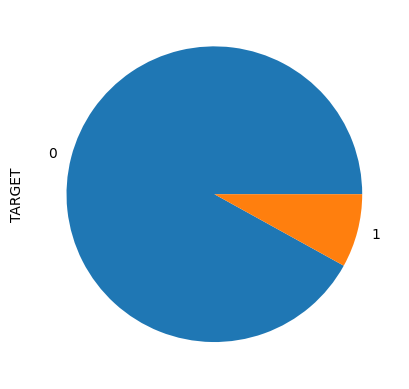

In [283]:
#Data Train's TARGET distribution
y_train.value_counts().plot(kind='pie')
plt.show()

Ternyata terdapat kasus imbalance class pada data train dengan rasio 1 dan 0 yang sangat ekstrim, sehingga akan dilakukan handling dengan metode SMOTE.

In [284]:
#Data preparation
#Class Imbalance handling with SMOTE method
from imblearn.over_sampling import SMOTE
from collections import Counter

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE= SMOTE()

# fit and apply the transform 
X_train, y_train= SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 195230, 1: 17057})
After oversampling:  Counter({0: 195230, 1: 195230})


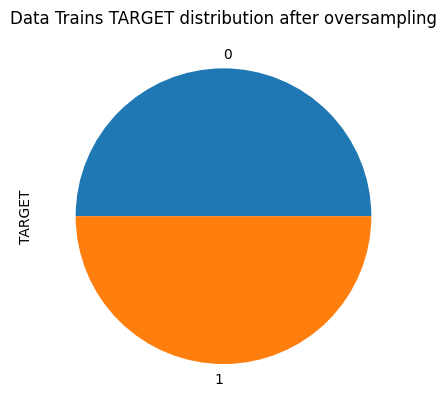

In [285]:
#Data Train's TARGET distribution after oversampling
import matplotlib.pyplot as plt
import pandas as pd

y_train.value_counts().plot(kind='pie')
plt.title('Data Trains TARGET distribution after oversampling')
plt.show()

#### Data Modeling

In [286]:
# Define evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm)
    
    print("Confusion Matrix")
    display(cm)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

In [287]:
#Data modeling
#Classification with Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [288]:
eval_classification(lr)

Confusion Matrix


,0,1
0,58684,26008
1,4294,3180


Accuracy (Test Set): 0.67
Precision (Test Set): 0.11
Recall (Test Set): 0.43
F1-Score (Test Set): 0.17
roc_auc (train-proba): 0.63
roc_auc (test-proba): 0.59


In [289]:
#Data modeling
#Classification with Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [290]:
eval_classification(dt)

Confusion Matrix


,0,1
0,33081,51611
1,2877,4597


Accuracy (Test Set): 0.41
Precision (Test Set): 0.08
Recall (Test Set): 0.62
F1-Score (Test Set): 0.14
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.50


In [291]:
#Data modeling
#Classification with XGBoost
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)

xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [292]:
eval_classification(xg)

Confusion Matrix


,0,1
0,17060,67632
1,1263,6211


Accuracy (Test Set): 0.25
Precision (Test Set): 0.08
Recall (Test Set): 0.83
F1-Score (Test Set): 0.15
roc_auc (train-proba): 0.95
roc_auc (test-proba): 0.54


In [293]:
#Data modeling
#Classification with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [294]:
eval_classification(rf)

Confusion Matrix


,0,1
0,52609,32083
1,4057,3417


Accuracy (Test Set): 0.61
Precision (Test Set): 0.10
Recall (Test Set): 0.46
F1-Score (Test Set): 0.16
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.56


Dari empat model yang digunakan, diketahui metode/model dengan nilai akurasi paling tinggi adalah model Logistic Regression. Tetapi selain dengan melihat nilai akurasinya, kami juga mengutamakan untuk mempertimbangkan nilai **recall**, karena tujuan utama dari model ini adalah berfokus untuk mengurangi false negative atau dalam kasus ini adalah client yang salah diprediksi tidak akan gagal bayar. Dan model dengan nilai recall tertinggi adalah XGBoost.

Tetapi untuk model XGBoost, nilai akurasi sangat buruk, yaitu hanya 24%, sehingga kami pertimbangkan akan lebih robust jika menggunakan Logistic regression. 

Untuk meningkatkan performa model, akan dilakukan hyperparameter tuning dengan parameter Regularization Parameter (C), dan penalty dengan 'L2'. Sebelum itu akan dilihat terlebih dahulu learning curve dari hyperparameter Regularization Parameter untuk melihat nilai parameter paling ideal yang akan digunakan.


param value: 0.001; train: 0.6238699387580183; test: 0.6155276230762337
param value: 0.01; train: 0.6263452719773501; test: 0.617297825648539
param value: 0.1; train: 0.6269759368556735; test: 0.6104283890319767
param value: 1; train: 0.6271921131620402; test: 0.5882669849884423
param value: 10; train: 0.6272838030913747; test: 0.5450408169502006
param value: 100; train: 0.6276453530674733; test: 0.5305033582879504


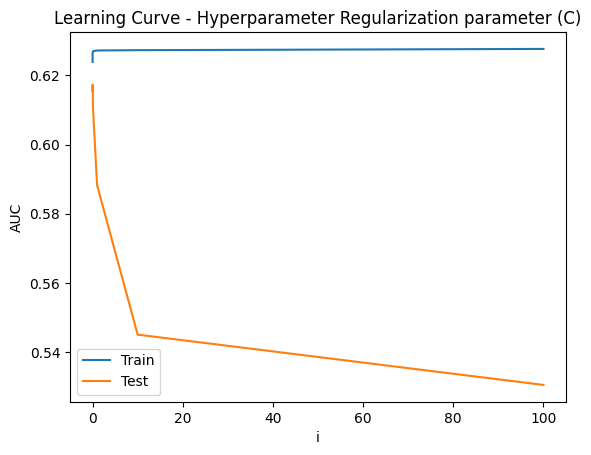

In [295]:
# Learning curve Regularization parameter (C)

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = LogisticRegression(C = i, random_state = 42)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('i')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter Regularization parameter (C)')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [0.001, 0.01, 0.1, 1, 10, 100]
draw_learning_curve(param_values)

Diketahui semakin besar nilai C menghasilkan skor aoc auc untuk training yang stabil, tetapi menurun pada testing. Nilai parameter C yang ideal berada pada kisaran 0.001, hingga 0.1. 
Untuk itu, akan dicari kembali nilai yang paling ideal pada range 0.001 hingga 0.1

param value: 0.001; train: 0.6238699387580183; test: 0.6155276230762337
param value: 0.002; train: 0.6252162575872293; test: 0.6168461867606186
param value: 0.003; train: 0.6256839710090315; test: 0.6172500632902985
param value: 0.004; train: 0.625913864877765; test: 0.6174193003037113
param value: 0.005; train: 0.6260517512498421; test: 0.6174628508917975
param value: 0.006; train: 0.6261445054127585; test: 0.6174704181757579
param value: 0.007; train: 0.626213327202234; test: 0.6174501918842039
param value: 0.008; train: 0.6262613827544976; test: 0.6174132701736744
param value: 0.009000000000000001; train: 0.6263054698302923; test: 0.6173637147324914
param value: 0.01; train: 0.6263452719773501; test: 0.617297825648539


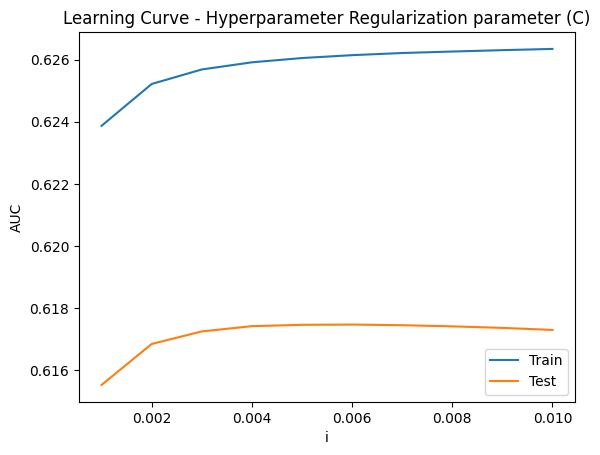

In [296]:
# Learning curve Regularization parameter (C)

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = LogisticRegression(C = i, random_state = 42)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('i')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter Regularization parameter (C)')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [x for x in np.linspace(0.001,0.01,10)]
draw_learning_curve(param_values)

dari learning curve, menunjukkan bahwa nilai parameter C yang dianggap ideal berada pada kisaran 0.001 hingga 0.006.
Kemudian akan dilakukan modeling dengan hyperparameter C antara 0.001, hingga 0.006, dan penalty menggunakan l2, dengan pencarian best estimator denganGridSearch

In [297]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
C = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006]
hyperparameters = dict(C = C, penalty = ['l2'])

# Inisialisasi Model
lr = LogisticRegression(random_state=42)
lr_tuning = GridSearchCV(lr, hyperparameters, cv=5, scoring = 'recall')
lr_tuning.fit(X_train, y_train)

# Predict & Evaluation
eval_classification(lr_tuning)

Confusion Matrix


,0,1
0,45757,38935
1,2822,4652


Accuracy (Test Set): 0.55
Precision (Test Set): 0.11
Recall (Test Set): 0.62
F1-Score (Test Set): 0.18
roc_auc (train-proba): 0.63
roc_auc (test-proba): 0.62


Setelah melakukan hyperparameter tuning, diketahui nilai recall model Logisticregression naik dari 47% menjadi 63%. Dan client yang tepat diprediksi akan gagal bayar bertambah, hal ini akan sangat menguntungkan karena kita dapat dengan mudah mengidentifikasi mana client yang akan gagal bayar di masa depan.

In [299]:
lr_tuning.best_estimator_

LogisticRegression(C=0.002, random_state=42)

Diketahui parameter dengan performa paling baik adalah C = 0.002.

Setelah itu, kita akan mencari feature apa yang memiliki kepentingan atau memberikan informasi paling banyak terhadap hasil prediksi label target.

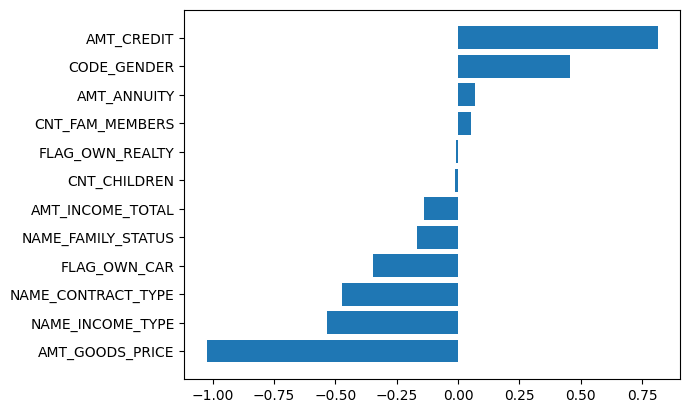

In [300]:
# ambil koefisien fitur dari model terbaik
best_model = lr_tuning.best_estimator_
# membuat DataFrame fitur dan koefisien
feature_coef = pd.DataFrame({'feature': X_train.columns.values, 'coef': best_model.coef_[0]})

# mengurutkan berdasarkan nilai koefisien
feature_coef = feature_coef.sort_values(by='coef', ascending = True)

# menampilkan grafik feature importance
plt.barh(feature_coef['feature'], feature_coef['coef'], orientation='horizontal')
plt.show()

Diketahui nilai AMT_CREDIT memiliki korelasi positif yang tinggi terhadap label target, hal ini mengindikasikan semakin tinggi nilai total kredit miliki client maka diprediksi bahwa client cenderung akan mengalami gagal bayar. Feature AMT_GOODS_PRICE memiliki nilai korelasi negatif yang tinggi, hal ini mengindikasikan bahwa semakin rendah nilai harga barang yang diajukan untuk dikreditkan, maka client akan semakin bertendensi untuk mengalami gagal bayar di masa depan.

In [319]:
# Menyimpan hasil prediksi ke dalam variable Final_dataset
final_prediction = lr_tuning.predict(X_test)
Final_dataset = pd.DataFrame([])
Final_dataset['ID'] = X_test_copy['SK_ID_CURR']
Final_dataset['TARGET'] = y_test
Final_dataset['Prediction target'] = final_prediction

#### Simulation and Conclusion

Simulasi penggunaan model untuk mengatasi masalah dilakukan dengan menggunakan data test, dimana pada data test diketahui terdapat 7474 client yang mengalami masalah pembayaran. 

In [304]:
print('Banyak client yang gagal bayar (Target = 1) adalah ', len(merge_test[merge_test['TARGET'] == 1]))

Banyak client yang gagal bayar (Target = 1) adalah  7474


Jika diasumsikan sebelum adanya model, bank melakukan review pengajuain kredit client secara manual, maka:

In [327]:
print('Client yang melakukan pengajuan kredit : ', len(X_test))
print('Client yang diprediksi akan gagal bayar, dan perlu direview lanjut : ', len(final_prediction[final_prediction == 1]))

Client yang melakukan pengajuan kredit :  92166
Client yang diprediksi akan gagal bayar, dan perlu direview lanjut :  43587


Jika menggunakan model ini, bank cukup perlu melakukan review lanjutan sebanyak 43587 client, atau kurang lebih hanya separuh dari total client awal. 

Kemudian disumsikan telah dilakukan review lanjutan, dan client yang tepat diprediksi akan gagal bayar akan ditolak pengajuan kreditnya. Diperoleh :

In [354]:
print('Persentase client gagal bayar awal : ', round(len(Final_dataset[Final_dataset['TARGET'] == 1])/len(Final_dataset),3))
print('Total semua client awal : ', len(Final_dataset))
ratio_after_model = (len(Final_dataset[Final_dataset['TARGET'] == 1]) - len(Final_dataset[(Final_dataset['TARGET'] == 1) & (Final_dataset['Prediction target'] == 1)]))/(len(Final_dataset) - len(Final_dataset[(Final_dataset['TARGET'] == 1) & (Final_dataset['Prediction target'] == 1)]))
print('Persentase client gagal bayar setelah penerapan model : ', round(ratio_after_model,3))
print('Total client yang diapprove kreditnya : ', (len(Final_dataset) - len(Final_dataset[(Final_dataset['TARGET'] == 1) & (Final_dataset['Prediction target'] == 1)])))

Persentase client gagal bayar awal :  0.081
Total semua client awal :  92166
Persentase client gagal bayar setelah penerapan model :  0.032
Total client yang diapprove kreditnya :  87514


Persentase client yang gagal bayar dapat turun dari 8% menjadi 3%, dengan banyak client yang diapprove turun dari 92.166 menjadi hanya 87.514

Conclusion :
* Dari model yang digunakan, Logistic regression memiliki performa paling baik. Selanjutnya model ini sebaiknya digunakan untuk melakukan prediksi client yang gagal bayar di masa depan sehingga review pengajuan kredit client dapat dilakukan dengan lebih mudah dan lebih cepat.
* Performa model dianggap baik, tapi masih kurang akurat. Selanjutnya mungkin harus dilakukan pemilihan feature yang lebih merepresentasikan customer dengan baik, dan mudah dilakukan maintenancenya sehingga model dapat digunakan secara berlanjut. Model dengan algoritma lain mungkin dapat diexplore lebih lanjut untuk menemukan model dengan performa lebih tinggi.
* Melakukan review lanjutan secara manual pasti memerlukan waktu, dan cost, dimana sumber daya tersebut terbatas. Sehingga kita perlu menerapkan client prioritas yang perlu direview lebih lanjut. Hal ini dapat dilakukan dengan melihat total kredit dan harga barang yang diajukan untuk kredit, karena dua feature ini memiliki nilai koefisien feature importance yang tinggi. 
* Untuk menentukan customer prioritas yang harus direview, akan lebih mudah jika dilakukan client credit scoring daripada harus melihat nilai total kredit dan harga barang secara mentah. Direkomendasikan untuk membuat model baru untuk melakukan credit scoring ini